# 1절 단순 선형 회귀

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#insurance.csv 
#https://www.kaggle.com/datasets/mirichoi0218/insurance

In [3]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#나이와 의료비용 간의 선형 관계

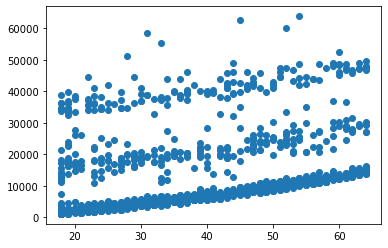

In [4]:
x=data['age']
y=data['charges']
plt.scatter(x,y)
plt.show()

## (1)선형 회귀(Linear Regression)

In [5]:
#fit에 입력되는 데이터는 2차원의 array 여야 하므로 reshape()를 사용하여 차원 맞추기
x = np.array(data['age'])
x = x.reshape(1338,1)
y = np.array(data['charges'])
y = y.reshape(1338,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [7]:
print(model.intercept_)
print(model.coef_)

[3165.88500606]
[[257.72261867]]


In [8]:
model.score(x,y) #결정계수

0.08940589967885804

In [12]:
x_new = [[19],[64]]
y_new = model.predict(x_new)
y_new

array([[ 8062.61476073],
       [19660.13260074]])

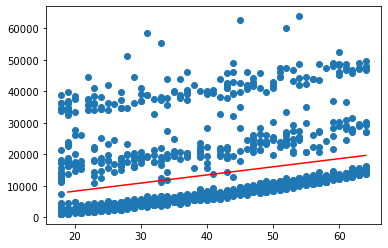

In [13]:
x=data['age']
y=data['charges']
plt.scatter(x,y)
plt.plot(x_new, y_new, '-r')
plt.show()

## (2) 경사하강법(Gradient Descent)

In [ ]:
#insurance.csv데이터로 선형회귀모델 구현

In [6]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
import numpy as np

data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
x = np.array(data['age'])
x = x.reshape([1338,1])
y = np.array(data['charges'])
y = y.reshape([1338,1])
                         

In [12]:
model_sgd = SGDRegressor(max_iter=1000, random_state =34)
model_sgd.fit(x,y)

C:\Users\kwkan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(random_state=34)

In [13]:
model_sgd.fit(x,y.ravel())

SGDRegressor(random_state=34)

In [17]:
print('절편 :', model_sgd.intercept_)
print('계수 :', model_sgd.coef_)

절편 : [9057.21833765]
계수 : [484.13243757]


In [18]:
model_sgd.score(x,y) #결정계수

-1.4678931558897292

In [19]:
x_new = [[19],[64]]
y_new = model_sgd.predict(x_new)
y_new

array([18255.73465154, 40041.69434233])

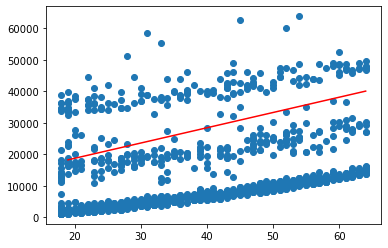

In [23]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x_new, y_new, '-r')

# 2절. 다항 회귀(Polynomial Regression)

In [24]:
import pandas as pd
import numpy as np
cereal = pd.read_csv('cereal.csv')
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [25]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [33]:
#object 컬럼 제외, 'surats'항목이 0보다 작은 경우 제외
cereal = cereal.iloc[:,3:]
cereal = cereal[cereal['sugars']>=0]

In [37]:
#산점도로 'sugars'&'rating'의 상관관계 확인
#'sugaars'기준으로 sorting하고 그래프 그려야 할 듯

cereal2 = cereal[['sugars','rating']]
cereal2.sort_values(by=['sugars'], inplace=True)
cereal2.reset_index(drop=True, inplace=True)
cereal2.head()


<ipython-input-37-2f82ef1881b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'], inplace=True)


,sugars,rating
0,0,64.533816
1,0,60.756112
2,0,63.005645
3,0,93.704912
4,0,68.235885


In [41]:
x = cereal2['sugars'].values
y = cereal2['rating'].values
x.shape

(76,)

In [39]:
cereal2.shape

(76, 2)

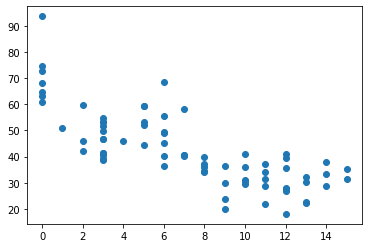

In [42]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [43]:
#train test 7:3 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [47]:
#학습
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train.reshape(-1,1))

In [48]:
#선형 회귀 학슴
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(x_poly, y_train)

LinearRegression()

In [49]:
#test 데이터도 polynomial 모형으로 변형하여 model_lin에 넣어 예측값 추출
x_poly_test = poly_reg.transform(x_test.reshape(-1,1))
pred = model_lin.predict(x_poly_test)

In [50]:
np.set_printoptions(precision=2) #소수점 2째자리까지 맞춤
print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1))

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [56]:
#metrics로 평가하기
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = model_lin.score(poly_reg.transform(x_test.reshape(-1,1)), y_test)
print(mse)
print(mae)
print(rmse)
print(acc)

print('MES\t{}'.format(round(mse,3)))
print('ACC\t{}%'.format(round(acc*100, 3)))

33.565110793010874
4.605784071295546
5.793540436815029
0.7437569749767234
MES	33.565
ACC	74.376%


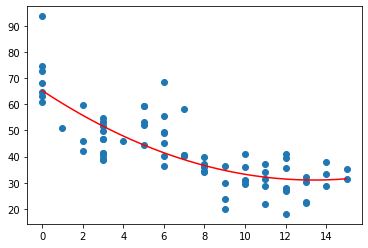

In [58]:
#다항식 그려서 확인하기
x_new = np.linspace(0,15,100).reshape(100,1)
x_new_poly = poly_reg.transform(x_new)
y_new = model_lin.predict(x_new_poly)

plt.plot(x,y,'o', label='Actual')
plt.plot(x_new, y_new, '-r', label='Prediction')